In [7]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

dt = 0.001
t = np.arange(0,60,dt)
f = np.sin(2*np.pi* 50 * t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

#FFT
n = len(t)
fhat = np.fft.fft(f,n) #FFT
PSD = fhat * np.conj(fhat) / n #power spectrum
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2), dtype='int')

indices = PSD > 100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)
filter = np.real(ffilt)



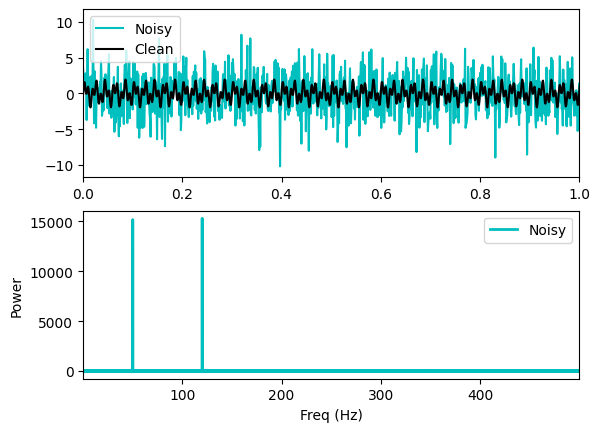

In [25]:
fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='c', linewidth='1.5', label='Noisy')
plt.plot(t, f_clean, color='k', linewidth='1.5', label='Clean')
plt.xlim(t[0],t[1000])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='c', linewidth='2', label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlabel('Freq (Hz)')
plt.ylabel('Power')
plt.legend()


In [26]:
Fs = 44100
sd.play(f_clean, Fs) 
sd.wait()

sd.play(f, Fs) 
sd.wait()

sd.play(filter, Fs) 
sd.wait()

In [27]:
import matplotlib.pyplot as plt

n = 128
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative

fhat = np.fft.fft(f)
kappa = (2 * np.pi/L) * np.arange(-n//2, n//2)
kappa = np.fft.fftshift(kappa)
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))



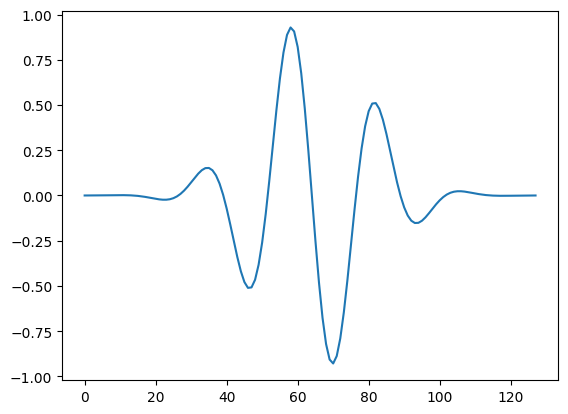

In [28]:
plt.plot(df)

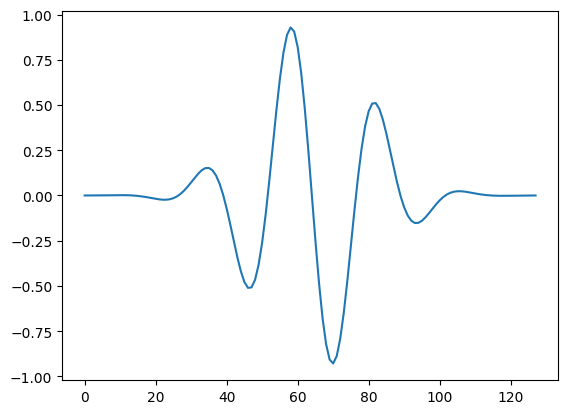

In [29]:
plt.plot(dfFFT)

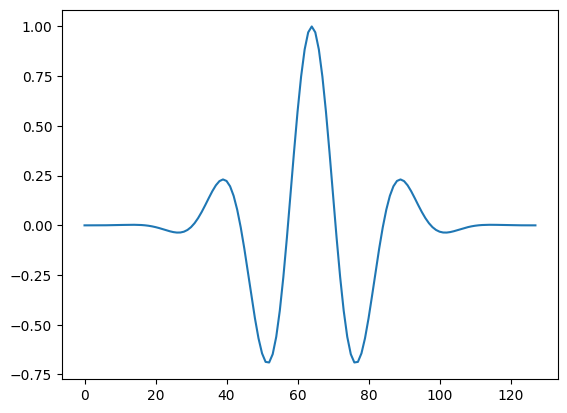

In [30]:
plt.plot(f)